In [1]:
#importing vital libraries
import pandas as pd
import numpy as np

In [2]:
#importing the dataset
data=pd.read_csv("Keru_reviews.csv")
data.head(10)

/home/hp/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,label,text
0,5,Looks ok. Not like so durable. Will hv to use ...
1,5,"Tried, the current can be very powerful depend..."
2,5,Item received after a week. Looks smaller than...
3,5,Thanks!!! Works as describe no complaints. Not...
4,5,Fast delivery considering it’s from overseas a...
5,5,Fast delivery good service
6,5,Got my order and it came well packaged. Have y...
7,5,Items received in a nice box. Have not used it...
8,5,"Received in good condition, tried so far so go..."
9,1,Item doesn’t work . \n\nAsked me to send a ref...


# Data cleaning

In [3]:
#import lib for datacleaning
import re
#toolkit
import nltk
#for removing the stopwords
from nltk.corpus import stopwords
#for stemming purpose
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet

In [5]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [4]:
#initialzing an empty array to append the clean data
corpus=[]
for i in range(0,5000):
    text=re.sub('[^a-zA-Z]', ' ' ,data['text'][i])
       
    #converting it the lowercase
    text=text.lower()
    #spliting the array
    text=text.split()
    #creating a stem object
    ps=PorterStemmer()
    #looping
    text=[ps.stem(word)  for word in text if not word in set(stopwords.words('english'))]
    
    #joning the n arrays to form a new string
    text=' '.join(text)
    #appending the new data
    corpus.append(text)


In [5]:
corpus

['look ok like durabl hv use recommend other worth',
 'tri current power depend set dare go higher go higher sure muscl becom sore see effect faster',
 'item receiv week look smaller expect wait tri',
 'thank work describ complaint realli expect life chang result thank',
 'fast deliveri consid oversea tri sure result yet',
 'fast deliveri good servic',
 'got order came well packag yet tri look good far thank',
 'item receiv nice box use yet hope work',
 'receiv good condit tri far good bad',
 'item work ask send refund show non work machin deem enough evid wast time buy',
 'fast great',
 'tri work advertis',
 'hub use muscl growth upper arm',
 'well receiv fast deliveri yet replac old pad hope work updat tri',
 'product receiv packag damag unit work well satisfi purchas thank',
 'good',
 'box littl beat smell overal nice pack came w guid manual',
 'fast deliveri howev product case slightli dent',
 'fast deliveri prompt respons materi good exactli like photo',
 'product receiv exactli p

In [11]:
#creating a cvs file with clean data
df=pd.DataFrame(corpus,columns=['text'])
df.to_csv('text_data.csv')


In [12]:
data1=pd.read_csv('text_data.csv')
data1

,Unnamed: 0,text
0,0,look ok like durabl hv use recommend other worth
1,1,tri current power depend set dare go higher go...
2,2,item receiv week look smaller expect wait tri
3,3,thank work describ complaint realli expect lif...
4,4,fast deliveri consid oversea tri sure result yet
...,...,...
4995,4995,item well receiv u shape keep drop need modifi...
4996,4996,receiv product work seller respons kinda slow ...
4997,4997,see get comfort worth buy
4998,4998,deliveri fast item well receiv work well thank


In [13]:
#checking the data
data1=pd.read_csv('text_data.csv')

data1['Label']=data['label']
data1.head(10)

,Unnamed: 0,text,Label
0,0,look ok like durabl hv use recommend other worth,5
1,1,tri current power depend set dare go higher go...,5
2,2,item receiv week look smaller expect wait tri,5
3,3,thank work describ complaint realli expect lif...,5
4,4,fast deliveri consid oversea tri sure result yet,5
5,5,fast deliveri good servic,5
6,6,got order came well packag yet tri look good f...,5
7,7,item receiv nice box use yet hope work,5
8,8,receiv good condit tri far good bad,5
9,9,item work ask send refund show non work machin...,1


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data1["sentiments"] = data1["text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

AttributeError: 'float' object has no attribute 'encode'

# Feature engineering

In [15]:
#counting the number of words
data1['Word_count']=data1['text'].apply(lambda x:len(str(x).split(" ")))
# train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))
data1.head()

,Unnamed: 0,text,Label,Word_count
0,0,look ok like durabl hv use recommend other worth,5,9
1,1,tri current power depend set dare go higher go...,5,17
2,2,item receiv week look smaller expect wait tri,5,8
3,3,thank work describ complaint realli expect lif...,5,10
4,4,fast deliveri consid oversea tri sure result yet,5,8


In [16]:
#Number of characters
data1['no_character']=data1['text'].str.len()
data1.head()

,Unnamed: 0,text,Label,Word_count,no_character
0,0,look ok like durabl hv use recommend other worth,5,9,48.0
1,1,tri current power depend set dare go higher go...,5,17,93.0
2,2,item receiv week look smaller expect wait tri,5,8,45.0
3,3,thank work describ complaint realli expect lif...,5,10,66.0
4,4,fast deliveri consid oversea tri sure result yet,5,8,48.0


In [17]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 5000 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 5000)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = data.iloc[:, 1].values


In [18]:
z=data.iloc[1,:].values
z

array([5,
       "Tried, the current can be very powerful depending on the setting, i don't dare to go higher but if go higher sure muscle will become sore and can see the effect faster."],
      dtype=object)

In [19]:
y

array(['Looks ok. Not like so durable. Will hv to use a while to recommend others of its worth.',
       "Tried, the current can be very powerful depending on the setting, i don't dare to go higher but if go higher sure muscle will become sore and can see the effect faster.",
       'Item received after a week. Looks smaller than expected, can’t wait to try!',
       ...,
       'Nice pair of shoes for a gd price. Note the cutting is a bit smaller than usual, I bought size 43, but is a bit tight compared to my usual size 43. So maybe recommended to buy 0.5 size bigger.',
       'Leather?   Rubbish....moulded plastic. What a a fake...how can shoppee allow such products to be sold.',
       'Your size 41 smaller than normal, more like size 40'],
      dtype=object)

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sentiments = SentimentIntensityAnalyzer()
# data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
# data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
# data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
# print(data.head())

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/hp/nltk_data...


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["text"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["text"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["text"]]
print(data1.head())

AttributeError: 'float' object has no attribute 'encode'

In [16]:
#Sentiment Polarity
def get_pol(text):
    try:
        pol=TextBlob(text).sentiment.polarity
    except:
        pol=0.0
    return pol
data1['sentimental_pol']=data1['text'].apply(get_pol)
data1

,Unnamed: 0,text,Label,Word_count,no_character,sentimental_pol
0,0,look ok like durabl hv use recommend other worth,5,9,48.0,0.0
1,1,tri current power depend set dare go higher go...,5,17,93.0,0.0
2,2,item receiv week look smaller expect wait tri,5,8,45.0,0.0
3,3,thank work describ complaint realli expect lif...,5,10,66.0,0.0
4,4,fast deliveri consid oversea tri sure result yet,5,8,48.0,0.0
...,...,...,...,...,...,...
4995,4995,item well receiv u shape keep drop need modifi...,4,15,84.0,0.0
4996,4996,receiv product work seller respons kinda slow ...,3,16,102.0,0.0
4997,4997,see get comfort worth buy,5,5,25.0,0.0
4998,4998,deliveri fast item well receiv work well thank,5,8,46.0,0.0


<BarContainer object of 5000 artists>

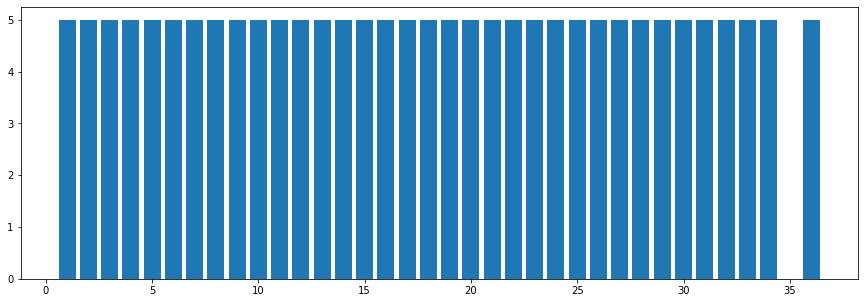

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(data1['Label'])